Shape: (506, 13)

Data Sample:
   Fault ID           Fault Type Fault Location (Latitude, Longitude)  \
0     F001        Line Breakage                 (34.0522, -118.2437)   
1     F002  Transformer Failure                   (34.056, -118.245)   
2     F003          Overheating                  (34.0525, -118.244)   
3     F004        Line Breakage                   (34.055, -118.242)   
4     F005  Transformer Failure                  (34.0545, -118.243)   

   Voltage (V)  Current (A)  Power Load (MW)  Temperature (°C)  \
0         2200          250               50                25   
1         1800          180               45                28   
2         2100          230               55                35   
3         2050          240               48                23   
4         1900          190               50                30   

   Wind Speed (km/h) Weather Condition Maintenance Status Component Health  \
0                 20             Clear          Scheduled   

C:\Users\Anish\AppData\Local\Temp\ipykernel_10180\1740563536.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


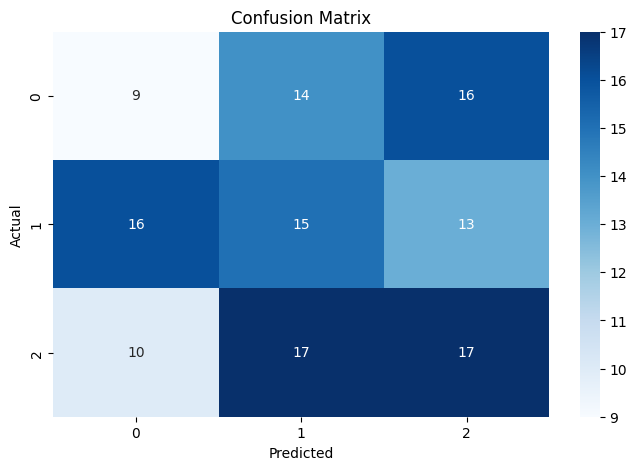

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# The code in the previous cell is already well-structured and functional.
# Here are a few improvements for clarity and best practices:

# 1. Use inplace=True for fillna is fine, but consider using a more robust imputation if needed.
# 2. Ensure all categorical columns are encoded, and avoid overwriting the same LabelEncoder instance.
# 3. Add comments for clarity and ensure all steps are reproducible.

# Improved version:

import matplotlib.pyplot as plt

# 1. Load Dataset
df = pd.read_csv("fault_data.csv")  # Replace with your filename

# 2. Display Basic Info
print("Shape:", df.shape)
print("\nData Sample:\n", df.head())

# 3. Handle Missing Values (Forward fill as a simple strategy)
df.fillna(method='ffill', inplace=True)

# 4. Encode Categorical Columns
label_cols = ['Fault Type', 'Weather Condition', 'Maintenance Status', 'Component Health']
encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# 5. Features and Labels
feature_cols = ['Voltage (V)', 'Current (A)', 'Power Load (MW)', 'Temperature (°C)', 'Wind Speed (km/h)',
                'Weather Condition', 'Maintenance Status', 'Component Health']
X = df[feature_cols]
y = df['Fault Type']

# 6. Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# 8. Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 9. Predict & Evaluate
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 10. Confusion Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()